In [41]:
import fastbook
fastbook.setup_book()

In [42]:
from fastbook import *
from fastai.vision.widgets import *

In [54]:
key = os.environ.get('COGNITIVE_SERVICE_KEY ', '36b44bf4c88141f6b8c2109e90d24179')

In [91]:
results = search_images_bing(key, 'Melasma skin')
images = results.attrgot('contentUrl')
len(images)

'https://healthjade.com/wp-content/uploads/2019/01/melasma.jpg'

In [92]:
melasma_types = ["Epidermal","Dermal", "Mixed"]
path = Path('melasma')

if not path.exists():
    path.mkdir()
for o in melasma_types:
    dest = (path/o)
    dest.mkdir(exist_ok=True)
    results = search_images_bing(key, f'{o} melasma')
    download_images(dest, urls=results.attrgot('contentUrl'))

In [111]:
files = get_image_files(path)
files

(#345) [Path('melasma/Dermal/04196adc-e46b-4fb5-8d9a-be317b331ed6.jpg'),Path('melasma/Dermal/071b657b-a2d8-47c5-952b-7b0ff2e9254b.jpg'),Path('melasma/Dermal/0b029226-0812-4340-bb3a-ec241d4339c6.jpg'),Path('melasma/Dermal/0dd637e7-6a03-487c-9b0c-66b104993068.jpg'),Path('melasma/Dermal/0e8254ea-2f18-491f-9e53-44eef686fc95.jpg'),Path('melasma/Dermal/1229d825-8ab0-4a8a-8b86-e5113352e58f.jpeg'),Path('melasma/Dermal/14a2ce13-27e1-4688-abf5-ed02d30b0d77.jpg'),Path('melasma/Dermal/1688c236-569c-411a-a214-0f4d6345ce61.jpg'),Path('melasma/Dermal/1ad6091a-904f-4aa5-8e17-8d74e8e27e7a.jpg'),Path('melasma/Dermal/1aea9c90-c3a7-4380-9eee-b1cb08fa310b.jpg')...]

In [112]:
corrupt = verify_images(files)
corrupt

(#0) []

In [113]:
corrupt.map(Path.unlink);

In [114]:
melasma = DataBlock(
        blocks=(ImageBlock, CategoryBlock),
        get_items=get_image_files,
        splitter=RandomSplitter(valid_pct=0.2, seed=41),
        get_y=parent_label,
        item_tfms=Resize(128)
        )

In [115]:
dls = melasma.dataloaders(path)

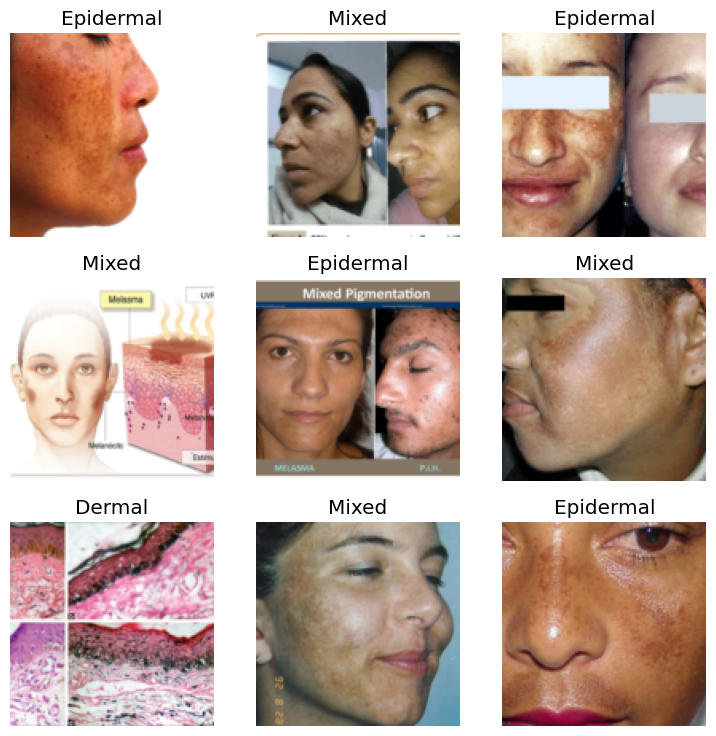

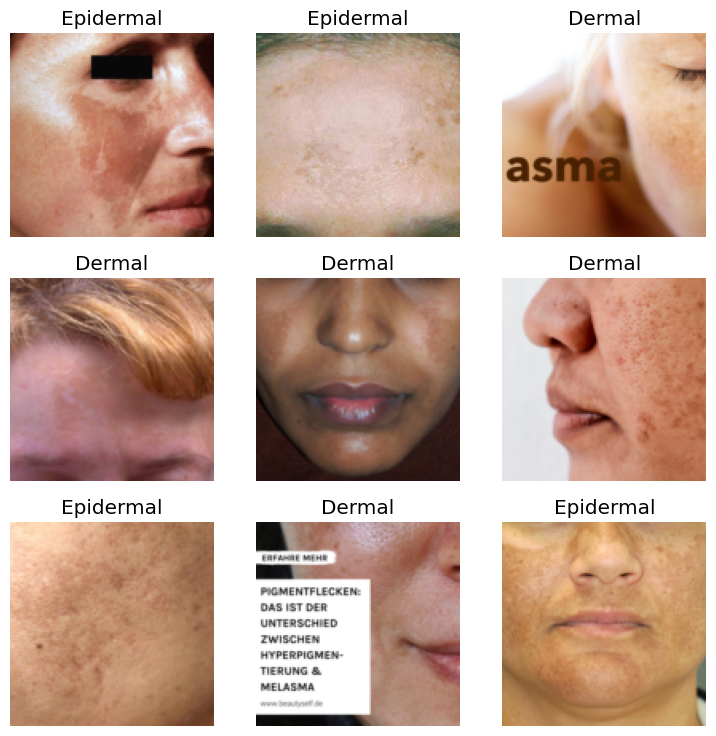

In [117]:
dls.train.show_batch(max_n=4, nrows=1)
dls.valid.show_batch()

In [118]:
learn = vision_learner(dls, 
                    resnet18, 
                    metrics=[accuracy, error_rate])

g:\Scientific_Research\Detect\venv\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
g:\Scientific_Research\Detect\venv\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [119]:
learn.fine_tune(4)


g:\Scientific_Research\Detect\venv\lib\site-packages\PIL\Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


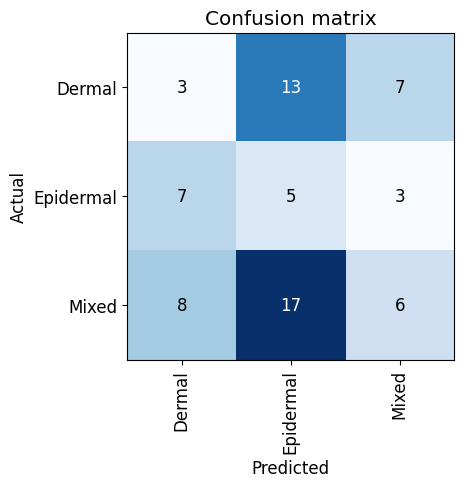

In [101]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

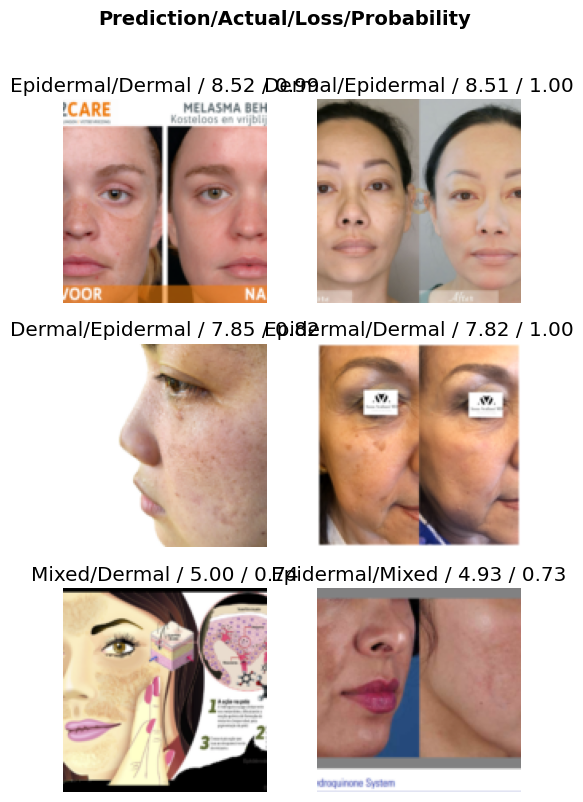

In [104]:
interp.plot_top_losses(6, nrows=3)

In [110]:
cleaner = ImageClassifierCleaner(learn)
cleaner

FileNotFoundError: [Errno 2] No such file or directory: 'G:\\Scientific_Research\\fastai_module_detect\\melasma\\Epidermal\\1210d13d-b5c4-42a1-be4d-b9bbacbc7ae7.jpg'

In [109]:
for idx in cleaner.delete(): 
    cleaner.fns[idx].unlink()

for idx,cat in cleaner.change(): 
    shutil.move(str(cleaner.fns[idx]), str(path/cat).split('.')[0] + '_fixed.jpg')

FileNotFoundError: [WinError 2] The system cannot find the file specified: 'melasma\\Epidermal\\1210d13d-b5c4-42a1-be4d-b9bbacbc7ae7.jpg'